# HW1
## Machine Learning
#### Chandler Smith

Summary: The purpose of this assignment is to create a model where a feature space and response will change on demand. In other words, create a training set where the strenght between feature space and response can be changed on demand. This enables us to apply various algorithims to understand how they behave in various situations. 

Cite: Numpy documentation, sklean docs, pandas, and W3Schools. GPT for debugging, Toppr, Machine Learning Mastery.com


In [60]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets as sd
import seaborn as sb

In [61]:
# df Setup
size = 10000
features = 20

#Binary categorical generation
binary = np.random.randint(2, size=size)
# Multiple classes generation - 5 classes
multiclass = np.random.randint(0, 5, size)

#generate date
# C = input samples, Y = output samples
X, y = sd.make_regression( size, features, n_informative=15, n_targets=1, bias=0.0, 
                    effective_rank=None, tail_strength=0.5, noise=0.0, 
                    shuffle=True, coef=False, random_state=None)
X = (X*1000) # increases the range and make them ints

#number generation based on X - by using weights from features, I can guarantee coorelation
weight = np.random.rand(features)
numeric = np.dot(X, weight) + np.random.randint(0, 100, size)

# make sure they are all of length size
#print(len(y))
#print(len(X.T[1]))
#print(len(numeric))
#print(len(binary))
#print(len(multiclass))
#print(X.shape)

# generate dataframes and populate                                               
df = pd.DataFrame(np.column_stack([numeric, binary, multiclass, X]), #transpose x so it fits the df
    columns=['Response1', 'Response2', 'Response3'] + [f'Feature{i+1}' for i in range(features)]) # name columns


In [62]:
## CONVERT TO CATEGORICAL
# print(df['Feature5'].head)
# remove decimal from categorical columns
# I know I could do this faster in Pandas but only recalled that after and this works well!

df['Response2'] = df['Response2'].astype(int)
df['Response3'] = df['Response3'].astype(int)
df['Feature1'] = df['Feature1'].astype(int)
df['Feature2'] = df['Feature2'].astype(int)
df['Feature3'] = df['Feature3'].astype(int)
df['Feature4'] = df['Feature4'].astype(int)
df['Feature5'] = df['Feature5'].astype(int)

# Convert response to binary and multiclass
for index, i in enumerate(df['Response2']):
    if (i % 2) == 0:
        df.loc[index, 'Response2'] = 0
    else:
        df.loc[index, 'Response2'] = 1

for index, i in enumerate(df['Response3']):
    if  i == 0:
        df.loc[index, 'Response3'] = 'Water'
    elif i == 1:
        df.loc[index, 'Response3'] = 'Coffee'
    elif i == 2:
        df.loc[index, 'Response3'] = 'Tea'
    elif i == 3:
        df.loc[index, 'Response3'] = 'Orange Juice'
    elif i == 4:
        df.loc[index, 'Response3'] = 'Whiskey'

# Convert features to binary and multiclass
for index, i in enumerate(df['Feature1']):
    if (i % 2) == 0:
        df.loc[index, 'Feature1'] = 'Y'
    else:
        df.loc[index, 'Feature1'] = 'N'

# Repeat for next feature
for index, i in enumerate(df['Feature2']):
    if i < 0:
         df.loc[index, 'Feature2'] = 'Day'
    else:
        df.loc[index, 'Feature2'] = 'Night'

# Repeat for next feature
for index, i in enumerate(df['Feature3']):
    if i < -333:
        df.loc[index, 'Feature3'] = 'Red'
    elif i <333:
        df.loc[index, 'Feature3'] = 'Green'
    elif i <10000:
        df.loc[index, 'Feature3'] = 'Blue'

# Repeat for next feature
for index, i in enumerate(df['Feature4']):
    if i < -333:
        df.loc[index, 'Feature4'] = 'Male'
    elif i < 333:
        df.loc[index, 'Feature4'] = 'Female'
    elif i < 10000:
        df.loc[index, 'Feature4'] = 'Other'

# Repeat for next feature
for index, i in enumerate(df['Feature5']):
    if  i < -333:
        df.loc[index, 'Feature5'] = 'Cat'
    elif i < 333:
        df.loc[index, 'Feature5'] = 'Dog'
    elif i < 10000:
        df.loc[index, 'Feature5'] = 'Rabbit'

#print(df['Feature5'].head)
#print(df.head)

# Expected Output
Here, we will demonstrate the following:
- Shape of the Dataframe.
- Descriptive statistics and visuals of all three response columns and three features of your choice. 
- Correlation matrix of the numerical feature space. 
- Scatterplot depicting the linear correlated nature of the three columns.
- Chi-square tests of the responses and categorical features.
- T-tests between the three numerical features of your choice and Response 1.

Shape: (10000, 23)

Descriptive statistics of Response1:
count    10000.000000
mean        52.507095
std       2339.182890
min      -7761.593692
25%      -1545.100002
50%         70.921768
75%       1634.614930
max       8504.439939
Name: Response1, dtype: float64


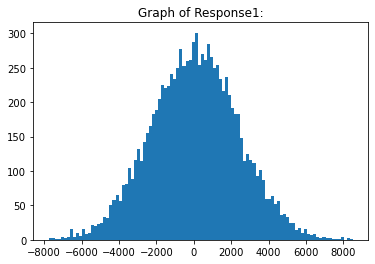


Descriptive statistics of Response2:
count    10000.000000
mean         0.499300
std          0.500025
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Response2, dtype: float64


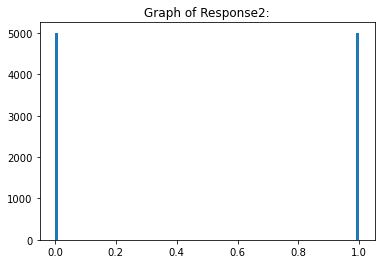


Descriptive statistics of Response3:
count       10000
unique          5
top       Whiskey
freq         2069
Name: Response3, dtype: object


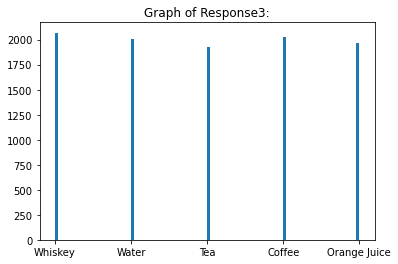


Descriptive statistics of Response1:
count    10000.000000
mean        52.507095
std       2339.182890
min      -7761.593692
25%      -1545.100002
50%         70.921768
75%       1634.614930
max       8504.439939
Name: Response1, dtype: float64


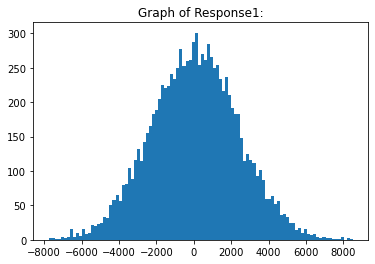


Descriptive statistics of Response2:
count    10000.000000
mean         0.499300
std          0.500025
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Response2, dtype: float64


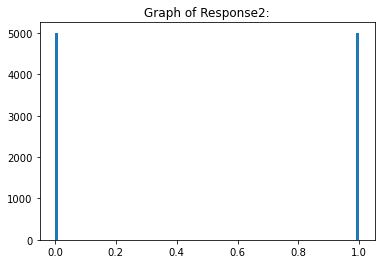


Descriptive statistics of Response3:
count       10000
unique          5
top       Whiskey
freq         2069
Name: Response3, dtype: object


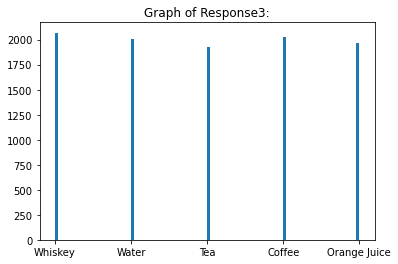

In [63]:
# Shape of the dataframe
print( "Shape:", df.shape)

# Descriptive statistics and visuals of all three response columns and three features of your choice.
rCols = ['Response1', 'Response2', 'Response3']
fCols = ['Feature1', 'Feature5', 'Feature10']

for i in rCols:
    print(f"\nDescriptive statistics of {i}:")
    print(df[i].describe())
    plt.hist(df[i], bins = 100)
    plt.title(f"Graph of {i}:")
    plt.show()

for i in rCols:
    print(f"\nDescriptive statistics of {i}:")
    print(df[i].describe())
    plt.hist(df[i], bins = 100)
    plt.title(f"Graph of {i}:")
    plt.show()

In [64]:
# Coorelation Matrix
numCols = [f'Feature{i}' for i in range(6, features)]
corr = df[numCols].corr()
print("Correlation Matrix")
print(corr)

Correlation Matrix
           Feature6  Feature7  Feature8  Feature9  Feature10  Feature11  \
Feature6   1.000000 -0.003289  0.001266  0.003640  -0.006598   0.005748   
Feature7  -0.003289  1.000000  0.006129  0.013325   0.001644   0.000059   
Feature8   0.001266  0.006129  1.000000  0.013570  -0.013400  -0.006546   
Feature9   0.003640  0.013325  0.013570  1.000000  -0.006185   0.009888   
Feature10 -0.006598  0.001644 -0.013400 -0.006185   1.000000  -0.014864   
Feature11  0.005748  0.000059 -0.006546  0.009888  -0.014864   1.000000   
Feature12  0.010218  0.011281  0.010194  0.002455   0.001754   0.005615   
Feature13  0.009568 -0.010808  0.017436  0.007075   0.012134   0.010863   
Feature14 -0.002426 -0.003326 -0.018152 -0.007483   0.014370  -0.002756   
Feature15 -0.001349 -0.005202  0.004562 -0.005002  -0.011080  -0.020597   
Feature16  0.003683  0.007974  0.000875 -0.003231  -0.011715  -0.013653   
Feature17 -0.004903 -0.007721 -0.017761  0.011898  -0.012273  -0.001742   
Featur

In [65]:
#chai-square tests of response and categorical features
catFeatures = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']
threeNumFeatures = ['Feature10', 'Feature11', 'Feature12',]

for i in rCols:
  for j in catFeatures:
    xTab = pd.crosstab(df[i], df[j], margins=True)
    chi, p_value, dof, expected = scipy.stats.chi2_contingency(xTab)
    print(f"Chi-squared for {i} and {j}: p-value {p_value}")

# T-Test
for i in threeNumFeatures:
  t, p_value = scipy.stats.ttest_ind(df['Response1'], df[i])
  print(f"T-Test for Response1 and {i}: p-value {p_value}")



Chi-squared for Response1 and Feature1: p-value 1.0
Chi-squared for Response1 and Feature2: p-value 1.0
Chi-squared for Response1 and Feature3: p-value 1.0
Chi-squared for Response1 and Feature4: p-value 1.0
Chi-squared for Response1 and Feature5: p-value 1.0
Chi-squared for Response2 and Feature1: p-value 0.9992458118866968
Chi-squared for Response2 and Feature2: p-value 0.9915685557245706
Chi-squared for Response2 and Feature3: p-value 0.2552313032282074
Chi-squared for Response2 and Feature4: p-value 0.988841050374547
Chi-squared for Response2 and Feature5: p-value 0.9905496427216491
Chi-squared for Response3 and Feature1: p-value 0.9999465302575149
Chi-squared for Response3 and Feature2: p-value 0.09926797180476495
Chi-squared for Response3 and Feature3: p-value 0.7505725611499059
Chi-squared for Response3 and Feature4: p-value 0.999837389008949
Chi-squared for Response3 and Feature5: p-value 0.9888277655765637
T-Test for Response1 and Feature10: p-value 0.032482744931921555
T-Test